# Microsoft Film Performance Insights 



## Background

Microsoft has observed that major companies are successfully creating original video content and capitalizing on the growing demand for streaming and theatrical releases. In response, Microsoft aims to establish a new movie studio to enter the competitive film industry. However, as a newcomer to movie production, Microsoft lacks the necessary insights into what types of films are currently thriving at the box office# Objective

The primary objective of this project is to conduct an exploratory data analysis (EDA) to identify the types of films that are currently performing the best at the box office. This analysis will provide actionable insights to guide Microsoft's new movie studio in making informed decisions about the genres, themes, and characteristics of films they should focus on producing.


# Expected Outcomes 

- Genre Recommendations: Identify top-performing genres that Microsoft should consider focusing on.
- Optimal Budget Ranges: Provide insights into budget ranges that maximize profitability.
- Release Strategies: Recommend optimal release times to enhance box office performance.
- Audience Insights: Understand the target demographics for different types of films to tailor content accordingly.



# Scope of Analysis

- Box Office Performance: Analyze the financial success of films over recent years, considering both domestic and international box office revenues.
- Genre Analysis: Examine which genres are most popular and profitable.
- Budget vs. Revenue: Investigate the relationship between production budgets and box office returns.
- Release Timing: Determine the impact of release dates and seasonal trends on box office performance.
- Audience and Critic Ratings: Assess genre prevalence based on audience and critic reviews, and vote count.

By addressing these key areas, the project aims to equip Microsoft with the knowledge needed to make strategic decisions in the competitive movie industry, ultimately leading to the successful launch and operation of their new movie studio

## Data Description 
This project will utilize data sourced from four prominent websites: Box Office Mojo by IMDb Pro, The Numbers, IMDb, and Rotten Tomatoes. The analysis will focus on various aspects such as box office revenues, audience and critic ratings, and movie metadata to derive insights into factors influencing movie success.



#### Data Sources
1. Box Office Mojo by IMDb Pro - 
URL:https://www.boxofficemojo.com/)
Data Collected: 
Movie Title, Studio,Domestic and Foreign Gross and Year

2. The Numbers - 
URL:  (https://www.the-numbers.com/)
Data Collected: 
Movie release dates, Movie Title, Production budget, Domestic and Worldwide Gross

3. IMDb - 
URL: (https://www.imdb.com/)
Data Collected: 
Movie metadata (directors, known for, movie_akas, movie_ratings, persons, principals and writers)

4. Rotten Tomatoes -
URL:  (https://www.rottentomatoes.com/)
Data Collected: 
Movie synopsis and genre, User ratings and reviews, Movie metadata (director	writer, theater date and dvd date) runtime, Box Office, and Studio 

#### Data Usage
The collected data will be used to perform various analyses, including:
- Box Office Performance in terms of domestic and international box office revenues.

- Popularity and profitability of genres 

- The relationship between production budgets and box office returns.

- The relationship between release timing and box office performance.

- Genre prevalence with respect to audience and critic reviews


By leveraging this comprehensive data from Box Office Mojo, The Numbers, IMDb, and Rotten Tomatoes, this project aims to provide in-depth insights into the elements that contribute to a movie's success. The findings will be valuable for Microsoft, in understanding the dynamics of the film industry. 

## Data Loading and Understanding

In [252]:
# Importing the relevant Libraries
import pandas as pd
import seaborn as sns
import sqlite3 as sqlite3
import matplotlib.pyplot as plt
%matplotlib inline

In [253]:
# Load CSV datasets
df1 = pd.read_csv('zippedData/bom.movie_gross.csv')
df2 = pd.read_csv('zippedData/rt.movie_info.tsv', delimiter='\t')
df3 = pd.read_csv('zippedData/tn.movie_budgets.csv', index_col=0)

#Connect to the SQL DataBase
conn = sqlite3.connect('zippedData/im.db')


In [254]:
#Exploring the CSV data sets
display(df1.head(2)) #Checking the 2 rows of dataframe1
display(df1.info()) # Obtaining a concise summary of dataframe1
display(df1.describe()) #descriptive statistics for the numerical columns


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


None

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


In [255]:
display(df2.head(2)) #Checking the 2 rows of dataframe2
display(df2.info()) # Obtaining a concise summary of dataframe2
display(df2.describe()) #descriptive statistics for the numerical columns

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


None

,id
count,1560.000000
mean,1007.303846
std,579.164527
min,1.000000
25%,504.750000
50%,1007.500000
75%,1503.250000
max,2000.000000


In [256]:
display(df3.head(2)) #Checking the 2 rows of dataframe3
display(df3.info()) # Obtaining a concise summary of dataframe3
display(df3.describe()) #descriptive statistics for the numerical columns

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 1 to 82
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   release_date       5782 non-null   object
 1   movie              5782 non-null   object
 2   production_budget  5782 non-null   object
 3   domestic_gross     5782 non-null   object
 4   worldwide_gross    5782 non-null   object
dtypes: object(5)
memory usage: 271.0+ KB


None

,release_date,movie,production_budget,domestic_gross,worldwide_gross
count,5782,5782,5782,5782,5782
unique,2418,5698,509,5164,5356
top,"Dec 31, 2014",Halloween,"$20,000,000",$0,$0
freq,24,3,231,548,367


##### DataFrame1 and DataFrame2 have some missing values which need to be cleaned, while DataFrame3 has no missing values 

## Data Cleaning


#### Checking for Duplicates


In [257]:
#Checking for duplicates in all the 3 dataframes 
df1_duplicates = df1.duplicated().sum()
df2_duplicates = df2.duplicated().sum()
df3_duplicates = df3.duplicated().sum()

print(df1_duplicates)
print(df2_duplicates)
print(df3_duplicates)

0
0
0


All the three DataFrames do not contain any duplicated rows

#### Dealing with Missing Values in df1


In [258]:
print("Count of Outliers per Column in df1")
display(df1.isna().sum()) #checking number of missing values in df1

print("The proportion of outliers in df1")
df1_missing_value_percentage = df1.isnull().mean() * 100
print(df1_missing_value_percentage)


Count of Outliers per Column in df1


title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

The proportion of outliers in df1
title              0.000000
studio             0.147623
domestic_gross     0.826690
foreign_gross     39.858282
year               0.000000
dtype: float64


Although the foreign_gross column has approximately 40% missing values, it will be retained because it is an important part of this analysis. 

In [259]:
# changing the foreign_gross column data type
df1['foreign_gross'] = pd.to_numeric(df1['foreign_gross'], errors='coerce')

# checking the summary stats for the column
display(df1['foreign_gross'].describe())

# Checking the median of the column
foreign_gross_median = df1['foreign_gross'].median()
print(f'The median is: {foreign_gross_median}')


count    2.032000e+03
mean     7.505704e+07
std      1.375294e+08
min      6.000000e+02
25%      3.775000e+06
50%      1.890000e+07
75%      7.505000e+07
max      9.605000e+08
Name: foreign_gross, dtype: float64

The median is: 18900000.0


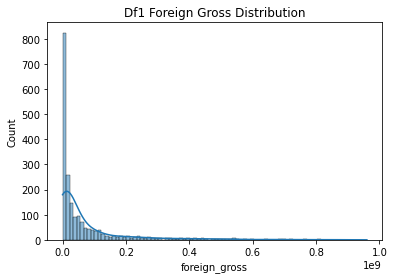

In [260]:
#Checking the distribution of foreign gross
sns.histplot(df1['foreign_gross'].dropna(), kde=True)
plt.title ("Df1 Foreign Gross Distribution")
plt.savefig('plots/foreign-gross-dstr.png')
plt.show()

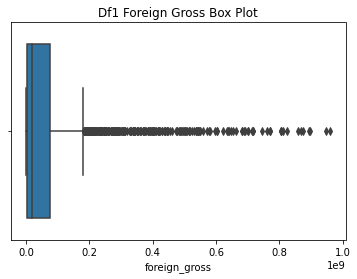

In [261]:
#Visualizing outliers
sns.boxplot(x=df1['foreign_gross'])
plt.title('Df1 Foreign Gross Box Plot')
plt.savefig('plots/foreign-gross-box-plot.png')
plt.show()

In [262]:
#Skewed distribution with presence of outliers, hence impute missing values in the column with the median
df1['foreign_gross'].fillna(df1['foreign_gross'].median(), inplace=True)

#confirm that the column no longer has missing values 
df1.isna().sum()


title              0
studio             5
domestic_gross    28
foreign_gross      0
year               0
dtype: int64

In [263]:
#drop the rows with missing values in the domestic gross and studio columns since they are a small percentage

df1.dropna(subset=['domestic_gross'], inplace=True)
df1.dropna(subset=['studio'], inplace=True)

# confirm that the null values have been dropped 
df1.isna().sum()


title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

#### Dealing with Missing Values in df2

In [264]:
display(df2.isna().sum()) #checking number of missing values in df2


df2_missing_value_percentage = df2.isnull().mean() * 100
print(df2_missing_value_percentage)

id                 0
synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1220
box_office      1220
runtime           30
studio          1066
dtype: int64

id               0.000000
synopsis         3.974359
rating           0.192308
genre            0.512821
director        12.756410
writer          28.782051
theater_date    23.012821
dvd_date        23.012821
currency        78.205128
box_office      78.205128
runtime          1.923077
studio          68.333333
dtype: float64


In [265]:
# List of columns to drop, since more than 50% of their data is missing
columns_to_drop = ['currency', 'box_office', 'studio'] 
df2.drop(columns=columns_to_drop, inplace=True)

# Display the remaining columns
print(df2.columns)


Index(['id', 'synopsis', 'rating', 'genre', 'director', 'writer',
       'theater_date', 'dvd_date', 'runtime'],
      dtype='object')


In [266]:

# Defining a function to remove 'minutes' and convert the runtime column into float
def remove_minutes(runtime_col):
    if isinstance(runtime_col, str):
        return float(runtime_col.replace(' minutes', ''))
    return runtime_col

# Apply the function to the 'runtime' column
df2['runtime'] = df2['runtime'].apply(remove_minutes)

print(f'The mean is: {df2["runtime"].mean()}')

print(f'The median is: {df2["runtime"].median()}')

The mean is: 103.96797385620916
The median is: 100.0


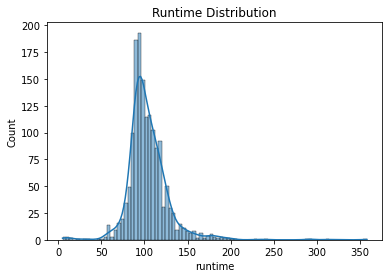

In [267]:
# Checking the distribution of runtime 
sns.histplot(df2['runtime'].dropna(), kde=True)
plt.title ("Runtime Distribution")
plt.savefig('plots/runtime-dstr.png')
plt.show()

In [268]:
#Since the column exhibits a symmetrical distribution, impute the missing values with the mean
df2['runtime'].fillna(df2['runtime'].mean(), inplace=True)

#confirm that the column no longer has missing values 
df2.isna().sum()

id                0
synopsis         62
rating            3
genre             8
director        199
writer          449
theater_date    359
dvd_date        359
runtime           0
dtype: int64

In [269]:
#Dropping missing values in the synopsis, rating, and genre columns as they account for a small percentage
df2.dropna(subset= ['synopsis', 'rating' , 'genre'], inplace= True)
df2.isna().sum()

id                0
synopsis          0
rating            0
genre             0
director        174
writer          398
theater_date    297
dvd_date        297
runtime           0
dtype: int64

In [270]:
#writting a custom function to impute the missing values in the remaining columns with the string 'unknown'
def custom_impute (col_name):
    return col_name.fillna('Unknown')

#columns to impute
cols_to_impute = ['director' , 'writer' , 'theater_date', 'dvd_date']
for col_name in cols_to_impute:
    df2[col_name] = custom_impute(df2[col_name])

df2.isna().sum()
    

id              0
synopsis        0
rating          0
genre           0
director        0
writer          0
theater_date    0
dvd_date        0
runtime         0
dtype: int64

#### Checking for Outliers in the Dataframes


In [271]:
#Converting the data type for data in production budget, domestic gross, and worldwide gross columns in  df3
# Remove dollar sign ($) and commas (,) 
df3['production_budget'] = df3['production_budget'].replace({'\$': '', ',': ''}, regex=True)
df3['worldwide_gross'] = df3['worldwide_gross'].replace({'\$': '', ',': ''}, regex=True)
df3['domestic_gross'] = df3['domestic_gross'].replace({'\$': '', ',': ''}, regex=True)


In [272]:
#convert to numeric in-place
df3['production_budget'] = pd.to_numeric(df3['production_budget'])
df3['worldwide_gross'] = pd.to_numeric(df3['worldwide_gross'])
df3['domestic_gross'] = pd.to_numeric(df3['domestic_gross'])

#### Visualizing the Distributions

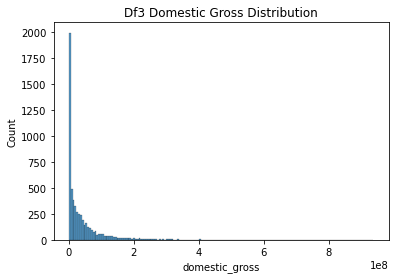

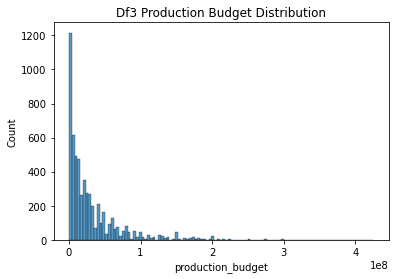

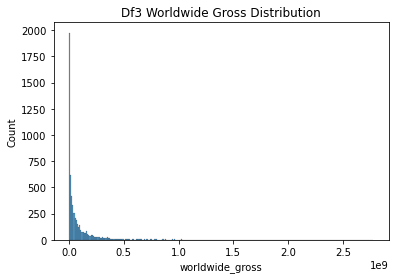

In [273]:
#Checking the distribution of production budget, worldwide gross, domestic gross
sns.histplot(df3['domestic_gross'])
plt.title ("Df3 Domestic Gross Distribution")
plt.savefig('plots/df3-domestic-gross-dstr.png')
plt.show()

sns.histplot(df3['production_budget'])
plt.title ("Df3 Production Budget Distribution")
plt.savefig('plots/production-budget-dstr.png')
plt.show()

sns.histplot(df3['worldwide_gross'])
plt.title ("Df3 Worldwide Gross Distribution")
plt.savefig('plots/WWide-gross-dstr.png')
plt.show()


### Count of Outliers

In [274]:

# Function to identify the number of outliers using the IQR method and return as a DataFrame
def find_outliers_iqr(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = column[(column < lower_bound) | (column > upper_bound)]
    outliers_df = pd.DataFrame({'Outlier': outliers})
    return outliers_df

# Calling the function onto different numeric columns on the three datasets
df1_domestic_gross_outliers = find_outliers_iqr(df1['domestic_gross'])
foreign_gross_outliers = find_outliers_iqr(df1['foreign_gross'])
runtime_outliers = find_outliers_iqr(df2['runtime'])
production_budget_outliers = find_outliers_iqr(df3['production_budget'])
worldwide_gross_outliers = find_outliers_iqr(df3['worldwide_gross'])
df3_domestic_gross_outliers = find_outliers_iqr(df3['domestic_gross'])

# Return the count of outliers in each column
print(f'Domestic gross outliers: {len(df1_domestic_gross_outliers)}')
print(f'Foreign gross outliers: {len(foreign_gross_outliers)}')
print(f'Runtime outliers: {len(runtime_outliers)}')
print(f'Production budget outliers: {len(production_budget_outliers)}')
print(f'Worldwide Gross outliers: {len(worldwide_gross_outliers)}')
print(f'Df3 Domestic Gross outliers: {len(df3_domestic_gross_outliers)}')


Domestic gross outliers: 406
Foreign gross outliers: 615
Runtime outliers: 67
Production budget outliers: 431
Worldwide Gross outliers: 604
Df3 Domestic Gross outliers: 463


In [275]:
#Checking the maximum and minimum values in the columns with outliers
def calculate_min_max (columns):
    for column in columns:
        max_value = column.max()
        min_value = column.min()
        print(f'Minimum value in: {column.name} = {min_value} and Maximum value = {max_value} ')

columns = [df1['domestic_gross'], df1['foreign_gross'], df2['runtime'], df3['domestic_gross'], df3['worldwide_gross'], df3['production_budget']]

calculate_min_max(columns)

Minimum value in: domestic_gross = 100.0 and Maximum value = 936700000.0 
Minimum value in: foreign_gross = 600.0 and Maximum value = 960500000.0 
Minimum value in: runtime = 5.0 and Maximum value = 358.0 
Minimum value in: domestic_gross = 0 and Maximum value = 936662225 
Minimum value in: worldwide_gross = 0 and Maximum value = 2776345279 
Minimum value in: production_budget = 1100 and Maximum value = 425000000 


### Descriptive Analysis and Summarization 

### A. Box Office Performance
In this section, we look at an analysis of the financial success of films over recent years, considering both domestic and international box office revenues data from DataFrame1. 
We will also explore further to check the total gross per studio, to identify Microsoft's likely-to-be top 10 competitors


c:\Users\Julie Musangi\anaconda3\envs\learn-env\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


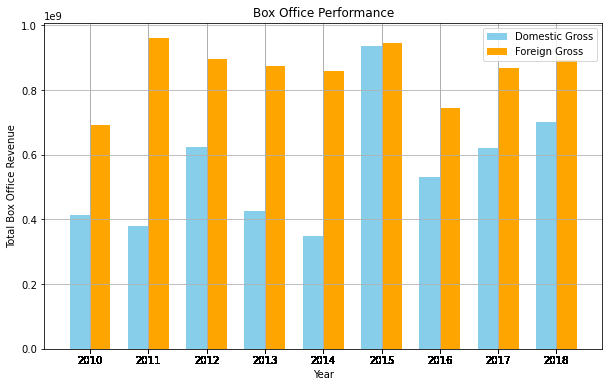

In [276]:
#Plotting the Grouped Bar Chart
bar_width = 0.35
plt.figure(figsize=(10, 6))
plt.bar(df1['year'] - bar_width/2, df1['domestic_gross'], width=bar_width, label='Domestic Gross', color='skyblue')
plt.bar(df1['year'] + bar_width/2, df1['foreign_gross'], width=bar_width, label='Foreign Gross', color='orange')
plt.xlabel('Year')
plt.ylabel('Total Box Office Revenue')
plt.title('Box Office Performance')
plt.legend()
plt.grid(True)
plt.xticks(df1['year'])
plt.show();

### Key Observations
In most years shown, the foreign gross (orange bars) tends to be higher than the domestic gross (sky blue bars), indicating that international box office revenue is generally greater than domestic revenue.

Year-to-Year Comparison:
Between 2011 and 2014, there is a noticeable trend that shows that the foreign gross is significantly higher than the domestic gross. This could be attributed to a global expansion of the film industry, emerging markets, and better marketing strategies witnessed in the early 2010's. However, from 2015 to 2018, the gap between domestic and foreign revenues significantly reduced. This could possibly be attributed to market saturation, increased popularity of streaming services, and a possible improvement in the quality and variety of domestic content.
Revenue Peaks:

The highest foreign gross is observed in 2011.
The highest domestic gross is also observed in 2015, indicating that 2015 was a strong year for both domestic and international box office revenues.

### Plotting Revenue per Studio

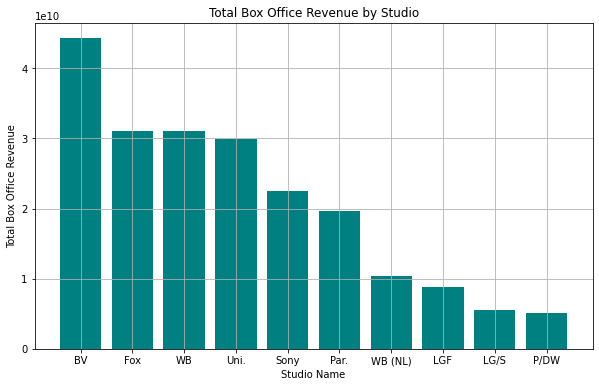

In [277]:
# Aggregate total revenue by studio, and obtain the top 10
df1['total_revenue'] = df1['domestic_gross'] + df1['foreign_gross']
studio_revenue = df1.groupby('studio')['total_revenue'].sum().reset_index().sort_values(by='total_revenue', ascending=False).head(10)

# Plotting the Bar Chart
plt.figure(figsize=(10, 6))
plt.bar(studio_revenue['studio'], studio_revenue['total_revenue'], color='teal')
plt.xlabel('Studio Name')
plt.ylabel('Total Box Office Revenue')
plt.title('Total Box Office Revenue by Studio')
plt.grid(True)
plt.show()

### Key Takeaways from the Studio Revenue Plot
From the above graph, the top 5 studios in terms of revenue (foreign and domestic) generated between 2010 and 2018 are BV, Fox, WB, Uni,and Sony. 
Microsoft would be entering an industry dominated by established giants with significant resources and longstanding relationships in the film industry. Competing against these major studios would require substantial investment and strategic planning.The dominance of these studios indicates specific market dynamics, including audience preferences, distribution networks, and industry trends. Understanding and navigating these dynamics would be crucial for Microsoft to carve out its niche in the market.To compete effectively, Microsoft would need to focus on producing high-quality content that resonates with audiences. This might involve investing in original content creation, securing valuable intellectual properties, or forming partnerships with established filmmakers and production companies. The top studios likely have well-established distribution channels, including theaters, streaming platforms, and international markets. Microsoft would need to develop or partner with distribution channels to ensure widespread access to its content.To stand out in a crowded market, Microsoft might need to innovate and differentiate its offerings. This could involve leveraging its technological expertise to enhance the viewing experience, experimenting with new storytelling formats, or targeting underserved audience segments.Given the competitive landscape, strategic partnerships could be instrumental for Microsoft's success. This might involve collaborations with existing studios, technology companies, or content creators to leverage complementary strengths and resources.

### B. Budget vs. Revenue
In this section, we investigate the relationship between production budgets and box office returns using the data from DataFrame3. With the insights gained from this section, Microsoft can make informed decisions and develop a strategic approach to entering the market that maximizes its chances of success and sustainability.


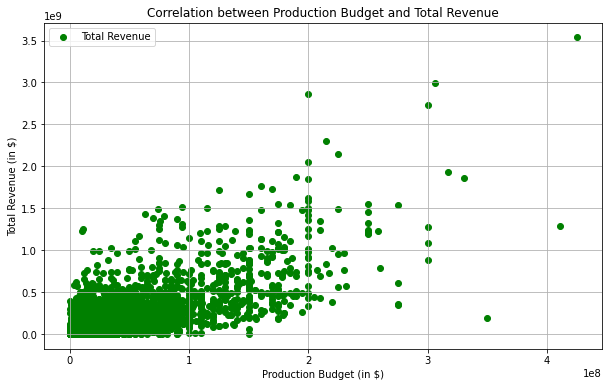

In [278]:
#Calculating Total Revenue
df3['total_revenue'] = df3['domestic_gross'] + df3['worldwide_gross']

# Plotting the production budget vs total revenue scatter plot
plt.figure(figsize=(10, 6))

plt.scatter(df3['production_budget'], df3['total_revenue'], color='green', label='Total Revenue') # Scatter plot for total revenue
plt.title('Correlation between Production Budget and Total Revenue')
plt.xlabel('Production Budget (in $)')
plt.ylabel('Total Revenue (in $)')
plt.legend()
plt.grid(True)


### Correlation between Budget and Revenue 
The scatter plot shows that there is a strong positive correlation between production budgets and box office returns. This implies that higher production budgets generally lead to higher box office returns. While this is true, it also means that films with high production budgets may have higher financial risks, since some films have high production budgets but very low revenue. 
Based on this scatter plot, Microsoft should consider developing a content investment strategy that aligns with its objectives and resources. This strategy may involve a mix of high-budget productions to compete with major studios, as well as lower-budget projects targeting specific audience segments.


### C. Release Timing
This section will investigate the impact of release dates on box office performance using the data from DataFrame3.The goal is to determine whether the month of the film release has an impact on the revenue generated




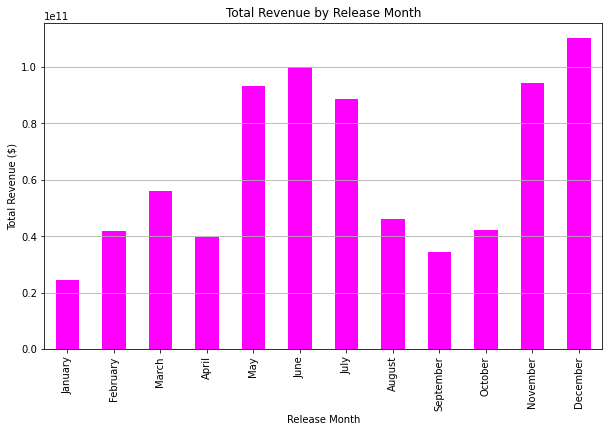

In [279]:
#Change the release_date column to datetime and obtain the month
df3['release_month'] = pd.to_datetime(df3['release_date']).dt.month

# Calculate total revenue per month
total_revenue_by_month = df3.groupby('release_month')['total_revenue'].sum()

#Map month number to month name for better visualization
month_names = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}
total_revenue_by_month.index = total_revenue_by_month.index.map(month_names)

# Plot release date per month against total revenue
plt.figure(figsize=(10, 6))
total_revenue_by_month.plot(kind='bar', color='magenta')
plt.title('Total Revenue by Release Month')
plt.xlabel('Release Month')
plt.ylabel('Total Revenue ($)')
plt.grid(axis='y')
plt.show()

### Release Timing vs Revenue Interpretation
The bar graph above suggests a seasonal trend in revenue based on the release month. There is a steady increase in revenue from January to March which is possibly due to new product releases, promotions, or increased consumer spending after the December holiday season. There is another slightly surge in revenue between May and June which might be attributed to new releases or seasonal factors like summer sales. The slight drop in July could be due to decreased consumer spending as people may be more focused on outdoor activities and vacations during the summer. The drastic decrease from August to October could be because this period coincides with the back-to-school season, where consumers might be spending less on entertainment and more on school-related expenses. Further, the drastic increase in November and December could be attributed to holiday shopping, with consumers purchasing gifts and taking advantage of Black Friday deals and last-minute purchases before the end of the year.

For this reason, Microsoft should strategically time its product releases to coincide with periods of increased consumer spending, such as before major holidays or during peak shopping seasons. They should also consider investing in marketing and promotional activities during peak revenue months to help maximize sales and capitalize on consumer interest. Microsoft could explore diversifying their product offerings to appeal to different market segments and mitigate the impact of seasonal fluctuations in specific product categories. This could be achieved through making film releases that coincide with cultural events or trends that influence consumer spending. For instance, they may consider releasing horror movies around Halloween or romantic comedies around Valentine's Day to align with the themes of these occasions and attract more audience looking for relevant entertainment options

### D.Genre Analysis
This section will examine which genres are most popular. We will also analyze the distribution of movie ratings (R, NR) to understand the type of content (mature vs. general audience) being produced.
Further, we will explore runtime trends to examine the average runtime of movies by genre. 


#### 1. Genre Popularity 


In [280]:
#Determine the total number of genres represented in the dataset df3
genre_counts = df2['genre'].nunique()
genre_counts

294

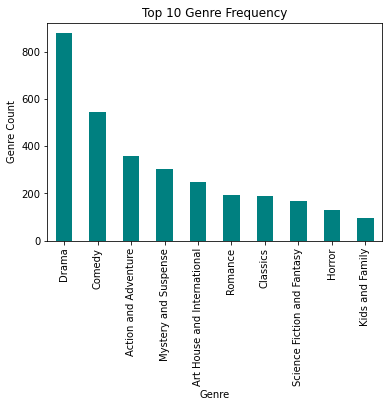

In [281]:
#Counting and ploting the top 10 genres 
top_ten_genres = df2['genre'].str.split('|').explode().value_counts().head(10)
top_ten_genres.plot(kind='bar', color= 'teal', title='Top 10 Genre Frequency')
plt.xlabel('Genre')
plt.ylabel('Genre Count')
plt.show()

#### 2. Type of Content

In [282]:
#Count of movie ratings 
movie_ratings = df2['rating'].value_counts()
movie_ratings


R        519
NR       444
PG       240
PG-13    235
G         56
NC17       1
Name: rating, dtype: int64

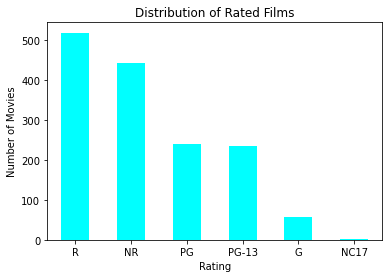

In [283]:
#Plotting the count of movie ratings 
movie_ratings.plot(kind='bar', color=['cyan'], title='Distribution of Rated Films')
plt.xlabel('Rating')
plt.ylabel('Number of Movies')
plt.xticks(rotation=0)
plt.show()

#### 3. Content Type by Genre

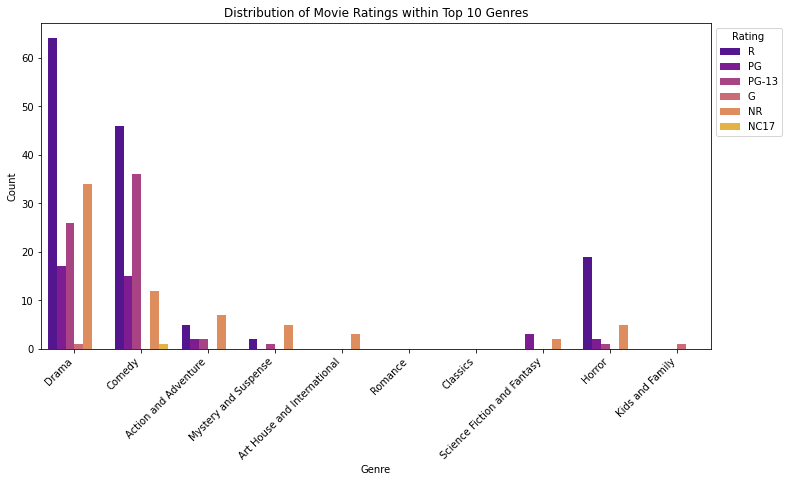

In [284]:
# Filtering dataframe to include only rows with one of the top 10 genres
top_ten_genres_list = df2['genre'].str.split('|').explode().value_counts().head(10).index.tolist()
filtered_df = df2[df2['genre'].str.split('|').apply(lambda x: any(item in x for item in top_ten_genres_list))]

# Plotting count of movie ratings for each of the top 10 genres
plt.figure(figsize=(12, 6))

sns.countplot(data=filtered_df, x='genre', hue='rating', palette='plasma', order=top_ten_genres_list)
plt.title('Distribution of Movie Ratings within Top 10 Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Rating', bbox_to_anchor=(1, 1));

#### 4. Average Runtime by Top 10 Genres.

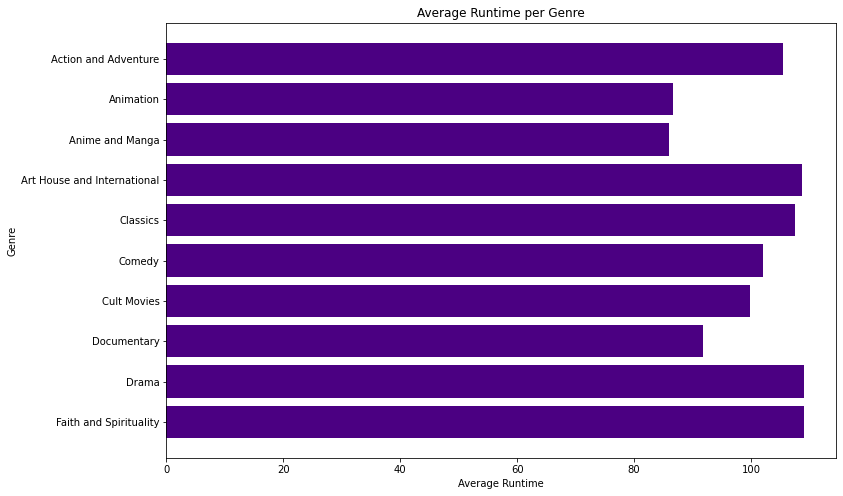

In [285]:
# Split the genre column into multiple rows
split_genres = df2['genre'].str.split('|', expand=True).stack().reset_index(level=1, drop=True)
split_df = df2.drop('genre', axis=1).join(split_genres.rename('genre'))

# Group by individual genres and calculate average runtime
average_runtime_per_genre = split_df.groupby('genre')['runtime'].mean().reset_index().head(10)

# Rename columns for clarity
average_runtime_per_genre.columns = ['Genre', 'Average Runtime']

# Visualization
plt.figure(figsize=(12, 8))
plt.barh(average_runtime_per_genre['Genre'], average_runtime_per_genre['Average Runtime'], color='indigo')
plt.xlabel('Average Runtime')
plt.ylabel('Genre')
plt.title('Average Runtime per Genre')
plt.gca().invert_yaxis()
plt.show()

### Deductions from Genre Analysis
From the first plot, Drama appears to be the most popular genre, followed closely by Comedy, and Action and Adventure. Further, the Distribution of Movie Ratings bar graph shows that films with rated content are the most popular, followed closely by general audience content. Within the popular genres, majority of the films are rated, as seen in the Drama, Comedy, and Horror genres from the third bar graph. Lastly, a closer look at the average runtime within the top 10 genres reveals that most of the films are between 85 and 110 minutes long. Drama, Faith and Spirituality, Action and Adventure, and Art House and International films seem to have the longest runtimes, which might indicate more detailed and complex narratives. Notably, longer average runtimes are highly likely to translate to higher production costs. Therefore, as Microsoft prepares to enter the film production industry, there are several strategic considerations it can drawn from the analysis of genre popularity, rating distribution, and average runtimes.

- Focus on Popular Genres
Drama, Comedy, and Action and Adventure are the most popular genres. Investing in these genres could provide a solid entry point into the market with a higher chance of audience engagement and success. Microsoft's entry could leverage these popular genres to quickly establish a foothold in the industry.

- Rated Content Dominance
Films with rated content are the most popular, closely followed by content suitable for general audiences. This suggests a dual strategy; Mainstream Appeal: Producing films that cater to general audiences to attract families and younger viewers, and Adult and Mature Themes: Developing films with mature themes to tap into the larger adult audience market.

- Runtime and Complexity
Genres like Drama, Faith and Spirituality, Action and Adventure, and Art House and International have longer runtimes, often indicative of more complex and detailed narratives. Therefore, Microsoft should invest in high-quality storytelling and well-developed stories, especially in these genres, while also being prepared for higher production costs associated with these longer, more detailed films. Adequate budgeting and resource allocation will be crucial.

 ### E. Audience and Critic Ratings
 This section will analyze audience and critic ratings to assess genre prevalence based on audience and critic reviews, and vote count.

 

In [286]:
#Checking the tables in the DataBase
tables = ('''
SELECT name 
FROM sqlite_master 
WHERE type = "table";''')
pd.read_sql (tables, conn)


,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


In [287]:
#Checking the first 10 columns of the movie_basics table
movie_basics_query = ('''SELECT * FROM movie_basics;''')
movie_basics_df = pd.read_sql(movie_basics_query, conn)
movie_basics_df.head(10)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
5,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy
6,tt0112502,Bigfoot,Bigfoot,2017,NaN,"Horror,Thriller"
7,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy"
8,tt0139613,O Silêncio,O Silêncio,2012,NaN,"Documentary,History"
9,tt0144449,Nema aviona za Zagreb,Nema aviona za Zagreb,2012,82.0,Biography


In [288]:
#Checking the movie ratings table
ratings_query = ('''SELECT * FROM movie_ratings;''')
movie_ratings_df = pd.read_sql(ratings_query, conn)
movie_ratings_df.head(10)

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
5,tt1069246,6.2,326
6,tt1094666,7.0,1613
7,tt1130982,6.4,571
8,tt1156528,7.2,265
9,tt1161457,4.2,148


#### Merging the Tables 

In [289]:
#Merging the two tables 
merged_df = pd.merge(movie_basics_df, movie_ratings_df, on='movie_id', how='inner')
merged_df.head(10)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
5,tt0112502,Bigfoot,Bigfoot,2017,NaN,"Horror,Thriller",4.1,32
6,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",8.1,263
7,tt0146592,Pál Adrienn,Pál Adrienn,2010,136.0,Drama,6.8,451
8,tt0154039,So Much for Justice!,Oda az igazság,2010,100.0,History,4.6,64
9,tt0159369,Cooper and Hemingway: The True Gen,Cooper and Hemingway: The True Gen,2013,180.0,Documentary,7.6,53


#### 1. Investigating Average Ratings by Genre

In [290]:
# Split the genres and explode the DataFrame
exploded_df = merged_df.assign(genres=merged_df['genres'].str.split(',')).explode('genres')

# Calculate average ratings by genre
avg_ratings_by_genre = exploded_df.groupby('genres')['averagerating'].mean().reset_index().sort_values(by='averagerating', ascending=False)
top_ten_avg_ratings_by_genre = avg_ratings_by_genre.head(10)

# Display the average ratings by genre
print("\nTop Ten Average Ratings by Genre:")
print(top_ten_avg_ratings_by_genre)



Top Ten Average Ratings by Genre:
         genres  averagerating
21        Short       8.800000
7   Documentary       7.332090
11    Game-Show       7.300000
17         News       7.271330
4     Biography       7.162274
14        Music       7.091972
12      History       7.040956
22        Sport       6.961493
24          War       6.584291
18   Reality-TV       6.500000


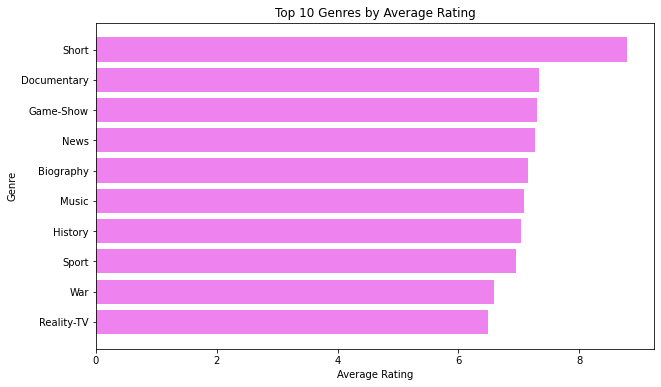

In [291]:
# Visualization: Inverted bar graph for top 10 genres by ratings
plt.figure(figsize=(10, 6))
plt.barh(top_ten_avg_ratings_by_genre['genres'], top_ten_avg_ratings_by_genre['averagerating'], color='violet')
plt.xlabel('Average Rating')
plt.ylabel('Genre')
plt.title('Top 10 Genres by Average Rating')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest rating at the top
plt.show()

#### 2. Investigating Average Number of Votes by Genre

In [292]:
# Calculate average number of votes by genre
avg_votes_by_genre = exploded_df.groupby('genres')['numvotes'].mean().reset_index().sort_values(by='numvotes', ascending=False)
top10_avg_votes_by_genre = avg_votes_by_genre.head(10)
top10_avg_votes_by_genre
# Display the average number of votes by genre
print("\nTop 10 Average Number of Votes by Genre:")
print(top10_avg_votes_by_genre)



Top 10 Average Number of Votes by Genre:
       genres      numvotes
2   Adventure  22067.746660
20     Sci-Fi  19474.292384
0      Action  14476.485690
10    Fantasy  12387.443086
3   Animation   8808.549627
25    Western   8758.485714
6       Crime   8594.959011
16    Mystery   8113.618295
23   Thriller   5860.449434
4   Biography   5673.259648


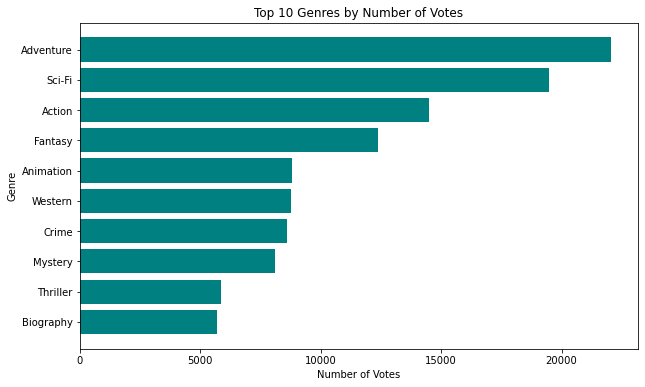

In [293]:
# Visualization: Inverted bar graph for top 10 genres by number of votes
plt.figure(figsize=(10, 6))
plt.barh(top10_avg_votes_by_genre['genres'], top10_avg_votes_by_genre['numvotes'], color='teal')
plt.xlabel('Number of Votes')
plt.ylabel('Genre')
plt.title('Top 10 Genres by Number of Votes')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest rating at the top
plt.show()

In [294]:
#closing the database
conn.close()

#### Key Insights 
Both plots highlight the genres that are not only highly rated but also have a significant number of votes, indicating strong audience engagement. This is crucial for identifying genres that are both critically acclaimed and popular among viewers.From the first plot, we see that genres such as Short films, Documentaries, and Game shows have the highest average ratings. These genres are likely to be well-received by critics.The second plot shows that while some genres have high ratings, others also have a substantial number of votes. For instance, Adventure, Sci-Fi, and Action have the highest vote counts respectively. This indicates that these genres are not only liked by critics but are also popular among a broad audience base. For this reason, Microsoft should consider producing films in genres that have high average ratings. These genres are likely to receive positive critical reviews, which can enhance the brand's reputation in the film industry. Furthermore, these genres have demonstrated significant audience engagement, which is crucial for box office success and streaming popularity. Ensuring high audience engagement can lead to better word-of-mouth promotion and sustained viewership.While focusing on high-rated and popular genres, Microsoft should also consider maintaining a diverse portfolio. This strategy can help in reaching different segments of the audience and mitigating the risk associated with focusing on a few genres.

## Recommendations 

 - Prioritize International Markets: To maximize revenue, Microsoft should focus on producing films with broad international appeal. This involves selecting themes, genres, and stories that resonate globally. Microsoft should invest heavily in localization efforts, including dubbing and subtitling, to cater to various linguistic and cultural markets. A diverse film portfolio is essential, mixing blockbusters with niche films tailored to specific audiences. Robust marketing campaigns should be implemented, leveraging digital marketing, social media, and influencer partnerships to reach both domestic and international viewers effectively. Additionally, Microsoft must establish strong global distribution networks to ensure their films are widely accessible.

- Strategic Entry and Differentiation in a Competitive Market: To successfully enter the film industry dominated by established giants, Microsoft should focus on strategic investment and planning. Microsoft must prioritize producing high-quality, original content that resonates with audiences, by potentially securing valuable intellectual properties or forming partnerships with established filmmakers and production companies. Further, Microsoft.should leverage its technological expertise to enhance the viewing experience, innovate with new storytelling formats, and target underserved audience segments to stand out in the market. 

- Strategic Investment in Film Production: The correlation between production budgets and box office returns indicates the need for a nuanced investment strategy. Microsoft should balance high-budget productions to compete with major studios with lower-budget projects targeting specific audience segments. This approach mitigates financial risks while maximizing revenue potential. Aligning investment with objectives and resources ensures a strategic and sustainable presence in the film industry.

- Strategic Release Timing: Microsoft should strategically time its product releases to coincide with periods of increased consumer spending, such as before major holidays or during peak shopping seasons. They should also consider investing in marketing and promotional activities during peak revenue months to help maximize sales and capitalize on consumer interest. Microsoft could explore diversifying their product offerings to appeal to different market segments and mitigate the impact of seasonal fluctuations in specific product categories. This could be achieved through making film releases that coincide with cultural events or trends that influence consumer spending. For instance, they may consider releasing horror movies around Halloween or romantic comedies around Valentine's Day to align with the themes of these occasions and attract more audience looking for relevant entertainment options

- Genre Focus Strategy, Diversified Content Approach, and Investment in Narrative Complexity: Microsoft should strategically focus its initial film productions on popular genres such as Drama, Comedy, and Action and Adventure. These genres exhibit high audience engagement and offer a favorable market entry point. Secondly, recognizing the dominance of rated content, Microsoft should adopt a diversified content strategy catering to both general audiences and mature viewers. This entails producing family-friendly films with broad appeal while also developing content featuring mature themes to capture the adult demographic.Given the correlation between genre runtime and narrative complexity, Microsoft should prioritize investments in storytelling quality and narrative depth, particularly within genres like Drama, Faith and Spirituality, Action and Adventure, and Art House and International. Emphasizing well-developed characters, intricate plots, and thematic depth can elevate the artistic merit of Microsoft's film productions and distinguish them in the marketplace. While longer runtimes may entail higher production costs, the potential for critical acclaim and audience resonance justifies the investment.
